In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load the source data file and read and display it with Pandas

movie_data = Path("English_Movies_Data1.csv")
movie_data_df = pd.read_csv(movie_data)
movie_data_df

,Name,Date,Score,Genre,Language,Budget,Revenue,Profit,Animation,Family,...,Fantasy,History,Romance,Documentary,Comedy,War,Drama,Crime,Thriller,Genre Sum
0,The Passion of the Christ,2004-02-25,74.00,Drama,English,"25,000,000.00","622,313,635.00","597,313,635.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1,John Wick: Chapter 2,2017-05-18,73.00,"Action,Thriller,Crime",English,"40,000,000.00","171,539,887.00","131,539,887.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00
2,John Wick: Chapter 3 - Parabellum,2019-05-16,74.00,"Action,Thriller,Crime",English,"55,000,000.00","326,709,727.00","271,709,727.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00
3,A Bronx Tale,1994-05-20,78.00,"Drama,Crime",English,"10,000,000.00","17,287,898.00","7,287,898.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,2.00
4,Avatar,2009-12-17,76.00,"Action,Adventure,Fantasy,Science Fiction",English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,The Love Guru,2008-07-10,42.00,"Comedy,Romance",English,"62,000,000.00","40,159,017.00","-21,840,983.00",0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00
4771,20th Century Women,2016-12-28,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
4772,Delta Force 2: The Colombian Connection,1990-08-24,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4773,The Russia House,1990-12-21,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00",0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,3.00


In [3]:
# # Load the source data file and read and display it with Pandas

# movie_data = Path("English_Movies_Data.csv")
# movie_data_df = pd.read_csv(movie_data)
# movie_data_df

In [4]:
# #Divide the revenue and profit by the number of genres for each title to get an equal dispersion 

# movie_data_df['Divided Revenue'] = movie_data_df['Revenue']/movie_data_df['Genre Sum']
# movie_data_df['Divided Profit'] = movie_data_df['Profit']/movie_data_df['Genre Sum']

# movie_data_df = movie_data_df[['Name', 'Year', 'Score', 'Genre', 'Language', 'Budget', 'Revenue',
#        'Profit', 'Music', 'Thriller', 'Comedy', 'Crime', 'TV Movie', 'Drama',
#        'Family', 'Western', 'Adventure', 'War', 'Fantasy', 'Horror', 'Romance',
#        'Animation', 'Mystery', 'Documentary', 'Action', 'Science Fiction',
#        'History', 'Divided Revenue', 'Divided Profit']]

# movie_data_df

KeyError: "['Year'] not in index"

In [5]:
#Divide the revenue and profit by the number of genres for each title to get an equal dispersion 

movie_data_df['Divided Revenue'] = movie_data_df['Revenue']/movie_data_df['Genre Sum']
movie_data_df['Divided Profit'] = movie_data_df['Profit']/movie_data_df['Genre Sum']

movie_data_df = movie_data_df[['Name', 'Date', 'Score', 'Genre', 'Language', 'Budget', 'Revenue',
       'Profit', 'Music', 'Thriller', 'Comedy', 'Crime', 'TV Movie', 'Drama',
       'Family', 'Western', 'Adventure', 'War', 'Fantasy', 'Horror', 'Romance',
       'Animation', 'Mystery', 'Documentary', 'Action', 'Science Fiction',
       'History', 'Divided Revenue', 'Divided Profit']]

movie_data_df

,Name,Date,Score,Genre,Language,Budget,Revenue,Profit,Music,Thriller,...,Horror,Romance,Animation,Mystery,Documentary,Action,Science Fiction,History,Divided Revenue,Divided Profit
0,The Passion of the Christ,2004-02-25,74.00,Drama,English,"25,000,000.00","622,313,635.00","597,313,635.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"622,313,635.00","597,313,635.00"
1,John Wick: Chapter 2,2017-05-18,73.00,"Action,Thriller,Crime",English,"40,000,000.00","171,539,887.00","131,539,887.00",0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"57,179,962.33","43,846,629.00"
2,John Wick: Chapter 3 - Parabellum,2019-05-16,74.00,"Action,Thriller,Crime",English,"55,000,000.00","326,709,727.00","271,709,727.00",0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"108,903,242.33","90,569,909.00"
3,A Bronx Tale,1994-05-20,78.00,"Drama,Crime",English,"10,000,000.00","17,287,898.00","7,287,898.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"8,643,949.00","3,643,949.00"
4,Avatar,2009-12-17,76.00,"Action,Adventure,Fantasy,Science Fiction",English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,"730,926,506.50","671,676,506.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,The Love Guru,2008-07-10,42.00,"Comedy,Romance",English,"62,000,000.00","40,159,017.00","-21,840,983.00",0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"20,079,508.50","-10,920,491.50"
4771,20th Century Women,2016-12-28,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,353,729.00","2,353,729.00"
4772,Delta Force 2: The Colombian Connection,1990-08-24,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"6,698,361.00","-2,447,456.80"
4773,The Russia House,1990-12-21,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00",0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,665,997.33","399,330.67"


In [6]:
#Retrieve the column headers to build the list of genres

column_headers = movie_data_df.columns

print(column_headers)

Index(['Name', 'Date', 'Score', 'Genre', 'Language', 'Budget', 'Revenue',
       'Profit', 'Music', 'Thriller', 'Comedy', 'Crime', 'TV Movie', 'Drama',
       'Family', 'Western', 'Adventure', 'War', 'Fantasy', 'Horror', 'Romance',
       'Animation', 'Mystery', 'Documentary', 'Action', 'Science Fiction',
       'History', 'Divided Revenue', 'Divided Profit'],
      dtype='object')


In [7]:
#Establish a list for the genre names

genre_list = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

In [9]:
# #Create a data frame that shows each title 
# revenue = []
# name = []
# Genre = []
# profit = []
# budget = []
# year = []
# score = []
# divrev = []
# divprof = []

# # Iterate over the DataFrame rows
# for index, row in movie_data_df.iterrows():
#     # Iterate over each genre column and check if it's 1
#     for genre in genre_list:
#         if row[genre] == 1:
#             # Append relevant data to lists
#             name.append(row['Name'])
#             revenue.append(row['Revenue'])  
#             profit.append(row['Profit'])
#             budget.append(row['Budget'])
#             year.append(row['Year'])
#             score.append(row['Score'])
#             divrev.append(row['Divided Revenue'])
#             divprof.append(row['Divided Profit'])
#             Genre.append(genre)
            
# # Create a DataFrame from the lists
# data = {'Name': name, 'Genre': Genre, 'Score':score,'Budget':budget, 'Revenue': revenue, 'Profit':profit, 'Year':year, 'Divided Revenue':divrev,'Divided Profit':divprof }
# df_genre = pd.DataFrame(data)
# df_genre

,Name,Genre,Score,Budget,Revenue,Profit,Year,Divided Revenue,Divided Profit
0,The Passion of the Christ,Drama,74.00,"25,000,000.00","622,313,635.00","597,313,635.00",2004,"622,313,635.00","597,313,635.00"
1,John Wick: Chapter 2,Crime,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
2,John Wick: Chapter 2,Thriller,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
3,John Wick: Chapter 2,Action,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
4,John Wick: Chapter 3 - Parabellum,Crime,74.00,"55,000,000.00","326,709,727.00","271,709,727.00",2019,"108,903,242.33","90,569,909.00"
...,...,...,...,...,...,...,...,...,...
13037,Darkman II: The Return of Durant,Horror,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13038,Darkman II: The Return of Durant,Adventure,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13039,Darkman II: The Return of Durant,Science Fiction,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13040,Darkman II: The Return of Durant,Thriller,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"


In [9]:
#Create a data frame that shows each title 
revenue = []
name = []
Genre = []
profit = []
budget = []
date = []
score = []
divrev = []
divprof = []

# Iterate over the DataFrame rows
for index, row in movie_data_df.iterrows():
    # Iterate over each genre column and check if it's 1
    for genre in genre_list:
        if row[genre] == 1:
            # Append relevant data to lists
            name.append(row['Name'])
            revenue.append(row['Revenue'])  
            profit.append(row['Profit'])
            budget.append(row['Budget'])
            date.append(row['Date'])
            score.append(row['Score'])
            divrev.append(row['Divided Revenue'])
            divprof.append(row['Divided Profit'])
            Genre.append(genre)
            
# Create a DataFrame from the lists
data = {'Name': name, 'Genre': Genre, 'Score':score,'Budget':budget, 'Revenue': revenue, 'Profit':profit, 'Date':date, 'Divided Revenue':divrev,'Divided Profit':divprof }
df_genre = pd.DataFrame(data)
df_genre

,Name,Genre,Score,Budget,Revenue,Profit,Date,Divided Revenue,Divided Profit
0,The Passion of the Christ,Drama,74.00,"25,000,000.00","622,313,635.00","597,313,635.00",2004-02-25,"622,313,635.00","597,313,635.00"
1,John Wick: Chapter 2,Crime,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017-05-18,"57,179,962.33","43,846,629.00"
2,John Wick: Chapter 2,Thriller,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017-05-18,"57,179,962.33","43,846,629.00"
3,John Wick: Chapter 2,Action,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017-05-18,"57,179,962.33","43,846,629.00"
4,John Wick: Chapter 3 - Parabellum,Crime,74.00,"55,000,000.00","326,709,727.00","271,709,727.00",2019-05-16,"108,903,242.33","90,569,909.00"
...,...,...,...,...,...,...,...,...,...
13060,Darkman II: The Return of Durant,Horror,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995-07-11,"95,132,261.20","71,932,261.20"
13061,Darkman II: The Return of Durant,Adventure,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995-07-11,"95,132,261.20","71,932,261.20"
13062,Darkman II: The Return of Durant,Science Fiction,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995-07-11,"95,132,261.20","71,932,261.20"
13063,Darkman II: The Return of Durant,Thriller,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995-07-11,"95,132,261.20","71,932,261.20"


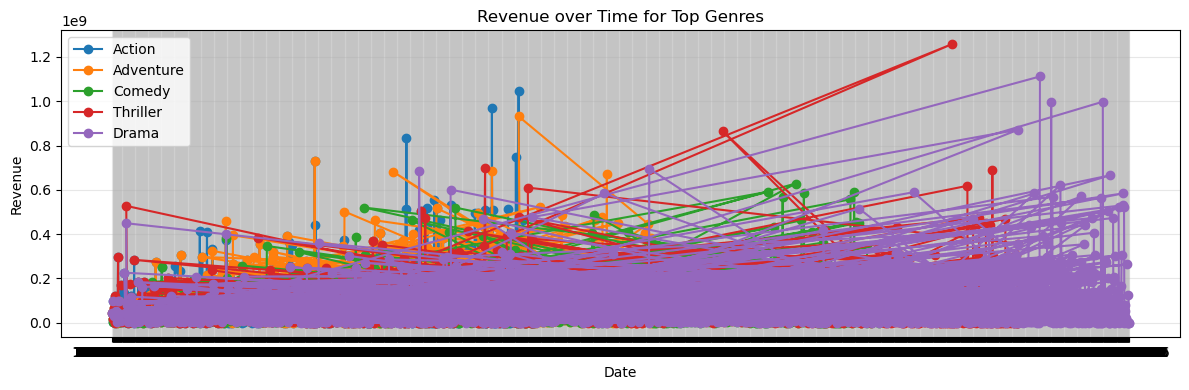

In [12]:
# Create a list of genres
genres = ['Action', 'Adventure', 'Comedy', 'Thriller', 'Drama']
# Create a figure for the plot
plt.figure(figsize=(12, 4))
# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    df_genre_genre = df_genre[df_genre['Genre'] == genre]
    # Group by year and calculate the median revenue for each year
    df_revenue_date = df_genre_genre.groupby('Date')['Divided Revenue'].sum().reset_index()
    # Plot median revenue for the current genre
    plt.plot(df_revenue_date['Date'], df_revenue_date['Divided Revenue'], marker='o', linestyle='-', label=genre)
# Add title and labels
plt.title('Revenue over Time for Top Genres')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (13042,) and (1,)

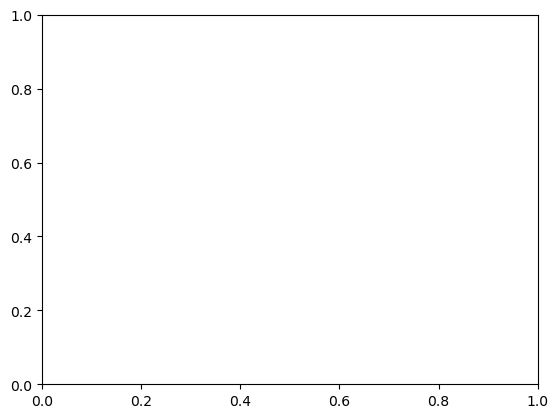

In [10]:
#Create a line plot to see the shape of the revenue data from all the movies

x = df_genre["Year"]
y = df_genre.groupby('Genre')['Revenue'].sum

plt.plot(x, y)

plt.show()

In [11]:
# Specify the value in the genre column to filter on
specific_genre = 'Action'

# Filter the DataFrame based on the specific value in the Genre column
filtered_df = df_genre[df_genre['Genre'] == specific_genre]

# Extract values from the 'Revenue' column based on the filtered DataFrame
values_list = filtered_df['Revenue'].tolist()

new_df = pd.DataFrame({'Action': values_list})

new_df

,Action
0,"171,539,887.00"
1,"326,709,727.00"
2,"2,923,706,026.00"
3,"75,958,800.00"
4,"20,844,907.00"
...,...
1370,"3,643,591.00"
1371,"684,351.00"
1372,"27,003,060.40"
1373,"6,698,361.00"


In [12]:
#Get a count of the number of movies within each genre

genre_counts = df_genre.groupby('Genre')['Revenue'].count()

# #Get a sum of the revenue, profit, divided revenue and divided profit

revenue_sum = df_genre.groupby('Genre')['Revenue'].sum()
profit_sum = df_genre.groupby('Genre')['Profit'].sum()
divrev_sum = df_genre.groupby('Genre')['Divided Revenue'].sum()
divprof_sum = df_genre.groupby('Genre')['Divided Profit'].sum()
score_sum = df_genre.groupby('Genre')['Score'].sum()

# Create a DataFrame from the sums and genre total
data = {'Score Sum':score_sum, 'Revenue Sum':revenue_sum, 'Profit Sum':profit_sum, 
        'Divided Revenue':divrev_sum, 'Divided Profit':divprof_sum, 'Total':genre_counts}

sums_df = pd.DataFrame(data)

sums_df

,Score Sum,Revenue Sum,Profit Sum,Divided Revenue,Divided Profit,Total
Genre,,,,,,
Action,"85,712.00","339,594,603,991.60","239,202,599,289.60","111,619,668,149.39","78,787,898,028.11",1375
Adventure,"63,051.00","315,692,929,421.00","227,868,617,582.00","91,090,687,135.91","65,763,650,257.72",980
Animation,"41,211.00","232,251,731,857.80","176,478,774,091.00","69,112,095,749.49","52,703,038,159.10",608
Comedy,"100,216.00","312,757,162,938.80","227,863,169,055.20","113,859,364,147.32","82,363,584,544.86",1581
Crime,"44,067.00","85,835,410,578.00","57,615,688,016.00","28,274,232,813.69","18,987,737,996.71",679
Documentary,"5,878.00","38,971,176,297.20","31,867,980,142.40","33,255,609,474.78","27,315,381,163.18",87
Drama,"116,300.00","260,380,246,879.00","184,200,770,588.40","107,708,221,267.81","77,325,506,805.20",1734
Family,"53,819.00","256,637,181,123.60","189,536,882,151.40","76,313,669,848.82","56,362,284,430.12",824
Fantasy,"39,228.00","188,361,914,244.40","137,296,433,135.80","54,651,733,970.29","39,836,002,106.88",612


In [13]:
#Adjust the score column to average score per genre by dividing by the Total column

sums_df['Score Avg'] = sums_df['Score Sum']/sums_df['Total']

sums_df

,Score Sum,Revenue Sum,Profit Sum,Divided Revenue,Divided Profit,Total,Score Avg
Genre,,,,,,,
Action,"85,712.00","339,594,603,991.60","239,202,599,289.60","111,619,668,149.39","78,787,898,028.11",1375,62.34
Adventure,"63,051.00","315,692,929,421.00","227,868,617,582.00","91,090,687,135.91","65,763,650,257.72",980,64.34
Animation,"41,211.00","232,251,731,857.80","176,478,774,091.00","69,112,095,749.49","52,703,038,159.10",608,67.78
Comedy,"100,216.00","312,757,162,938.80","227,863,169,055.20","113,859,364,147.32","82,363,584,544.86",1581,63.39
Crime,"44,067.00","85,835,410,578.00","57,615,688,016.00","28,274,232,813.69","18,987,737,996.71",679,64.90
Documentary,"5,878.00","38,971,176,297.20","31,867,980,142.40","33,255,609,474.78","27,315,381,163.18",87,67.56
Drama,"116,300.00","260,380,246,879.00","184,200,770,588.40","107,708,221,267.81","77,325,506,805.20",1734,67.07
Family,"53,819.00","256,637,181,123.60","189,536,882,151.40","76,313,669,848.82","56,362,284,430.12",824,65.31
Fantasy,"39,228.00","188,361,914,244.40","137,296,433,135.80","54,651,733,970.29","39,836,002,106.88",612,64.10


In [14]:
# #Create a bar chart to show revenue totals for each genre arranged in decending order

# sums_df= sums_df.sort_values(by="Revenue Sum", ascending=False)

# x_axis = np.arange(len(sums_df))
# tick_locations = [value+0.4 for value in x_axis]
# y_axis = sums_df["Revenue Sum"]/1000000000

# index_values = sums_df.index


#Create a bar chart to show revenue totals for each genre arranged in decending order

sums_df= sums_df.sort_values(by="Total", ascending=False)

x_axis = np.arange(len(sums_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = sums_df["Total"]

index_values = sums_df.index

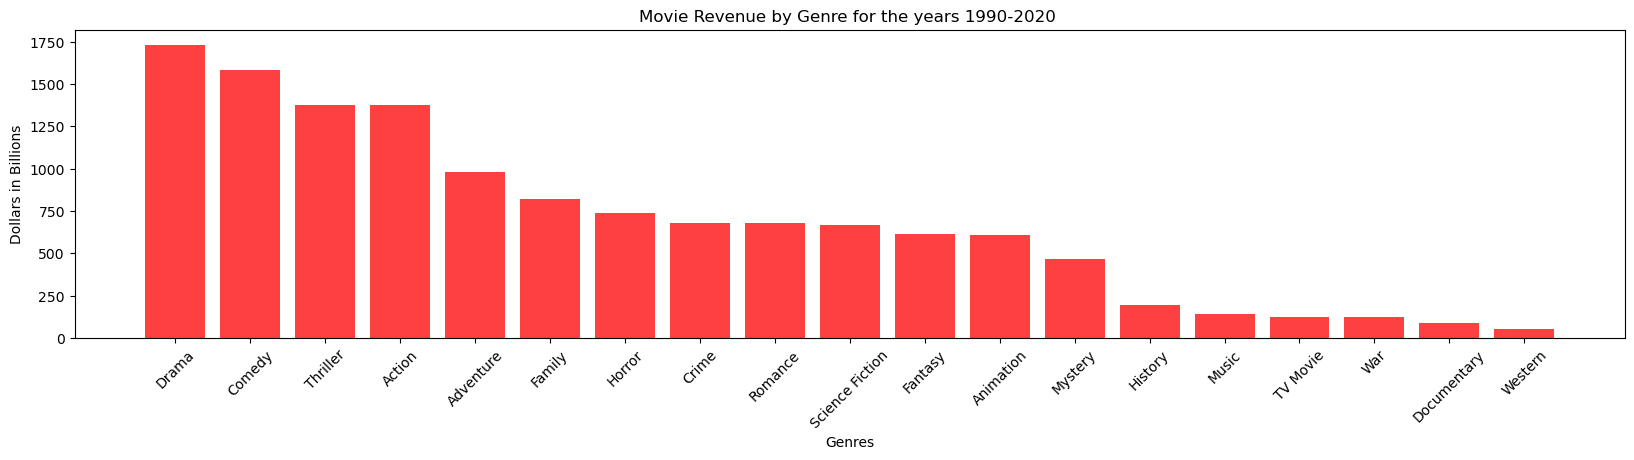

In [15]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, index_values, rotation=45)


plt.title("Movie Revenue by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Billions")

plt.show()

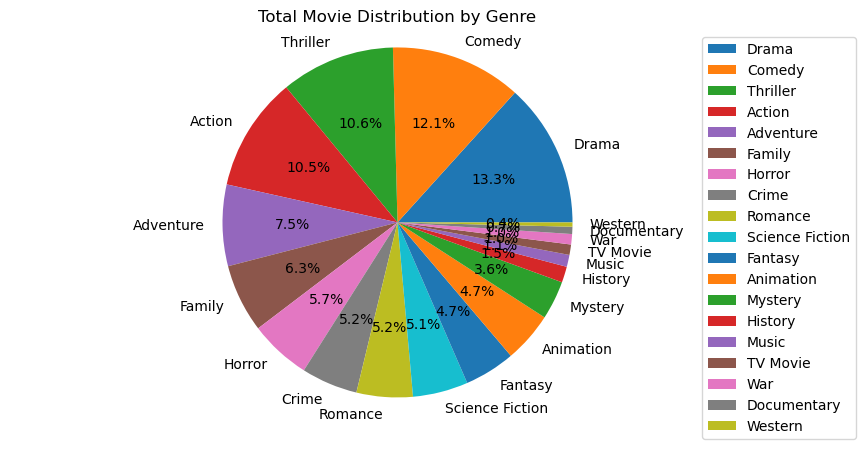

In [18]:
# Plotting the pie chart
plt.figure(figsize=(10, 5))
plt.pie(sums_df["Total"], labels=sums_df.index, autopct='%1.1f%%')
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
plt.title('Total Movie Distribution by Genre')
plt.axis('equal')
plt.show()

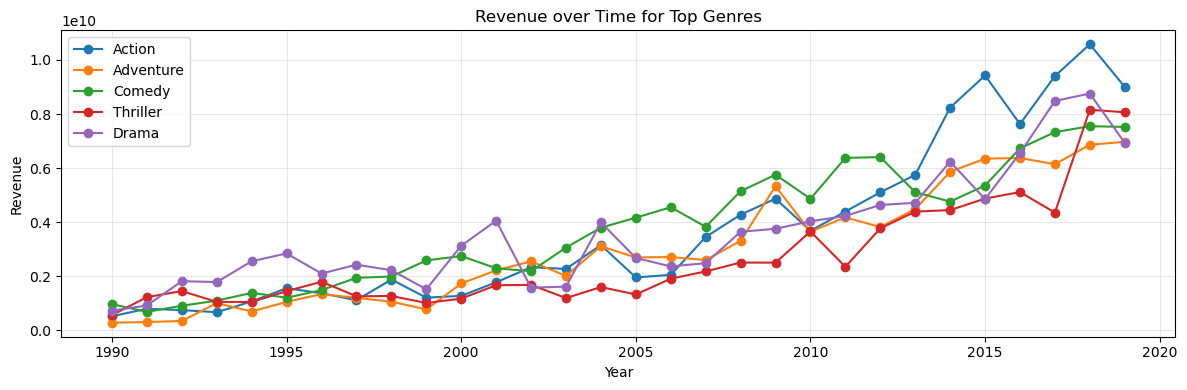

In [36]:
# Create a list of genres
genres = ['Action', 'Adventure', 'Comedy', 'Thriller', 'Drama']
# Create a figure for the plot
plt.figure(figsize=(12, 4))
# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    df_genre_genre = df_genre[df_genre['Genre'] == genre]
    # Group by year and calculate the median revenue for each year
    df_revenue_year = df_genre_genre.groupby('Year')['Divided Revenue'].sum().reset_index()
    # Plot median revenue for the current genre
    plt.plot(df_revenue_year['Year'], df_revenue_year['Divided Revenue'], marker='o', linestyle='-', label=genre)
# Add title and labels
plt.title('Revenue over Time for Top Genres')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

In [37]:
# Filter the DataFrame to the years we're looking for

start_year = 1900
end_year = 2005  

Nineties_df = df_genre.loc[(df_genre["Year"] >= start_year) & (df_genre["Year"] <= end_year)]

Nineties_df

,Name,Genre,Score,Budget,Revenue,Profit,Year,Divided Revenue,Divided Profit
0,The Passion of the Christ,Drama,74.00,"25,000,000.00","622,313,635.00","597,313,635.00",2004,"622,313,635.00","597,313,635.00"
7,A Bronx Tale,Crime,78.00,"10,000,000.00","17,287,898.00","7,287,898.00",1994,"8,643,949.00","3,643,949.00"
8,A Bronx Tale,Drama,78.00,"10,000,000.00","17,287,898.00","7,287,898.00",1994,"8,643,949.00","3,643,949.00"
15,Super Mario Bros.,Comedy,43.00,"42,000,000.00","20,844,907.00","-21,155,093.00",1993,"4,168,981.40","-4,231,018.60"
16,Super Mario Bros.,Adventure,43.00,"42,000,000.00","20,844,907.00","-21,155,093.00",1993,"4,168,981.40","-4,231,018.60"
...,...,...,...,...,...,...,...,...,...
13037,Darkman II: The Return of Durant,Horror,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13038,Darkman II: The Return of Durant,Adventure,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13039,Darkman II: The Return of Durant,Science Fiction,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"
13040,Darkman II: The Return of Durant,Thriller,55.00,"116,000,000.00","475,661,306.00","359,661,306.00",1995,"95,132,261.20","71,932,261.20"


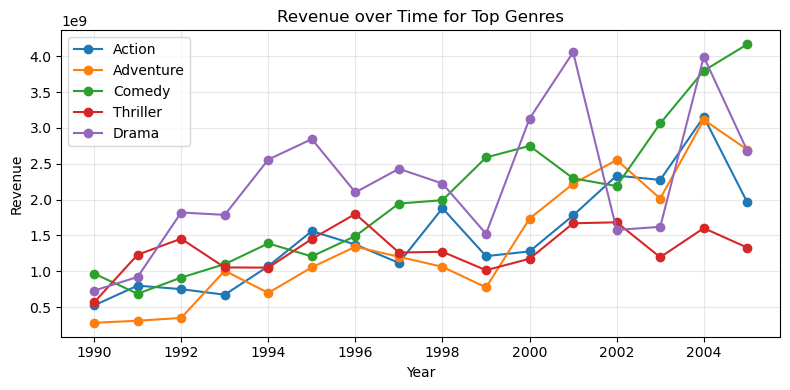

In [38]:
# Create a list of genres
genres = ['Action', 'Adventure', 'Comedy', 'Thriller', 'Drama']
# Create a figure for the plot
plt.figure(figsize=(8, 4))
# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    df_Nineties_genre = Nineties_df[Nineties_df['Genre'] == genre]
    # Group by year and calculate the median revenue for each year
    df_revenue_Ninties = df_Nineties_genre.groupby('Year')['Divided Revenue'].sum().reset_index()
    # Plot median revenue for the current genre
    plt.plot(df_revenue_Ninties['Year'], df_revenue_Ninties['Divided Revenue'], marker='o', linestyle='-', label=genre)
# Add title and labels
plt.title('Revenue over Time for Top Genres')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

In [39]:
# Filter the DataFrame to the years we're looking for

start_year = 2005
end_year = 2019  

Oughts_df = df_genre.loc[(df_genre["Year"] >= start_year) & (df_genre["Year"] <= end_year)]

Oughts_df

,Name,Genre,Score,Budget,Revenue,Profit,Year,Divided Revenue,Divided Profit
1,John Wick: Chapter 2,Crime,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
2,John Wick: Chapter 2,Thriller,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
3,John Wick: Chapter 2,Action,73.00,"40,000,000.00","171,539,887.00","131,539,887.00",2017,"57,179,962.33","43,846,629.00"
4,John Wick: Chapter 3 - Parabellum,Crime,74.00,"55,000,000.00","326,709,727.00","271,709,727.00",2019,"108,903,242.33","90,569,909.00"
5,John Wick: Chapter 3 - Parabellum,Thriller,74.00,"55,000,000.00","326,709,727.00","271,709,727.00",2019,"108,903,242.33","90,569,909.00"
...,...,...,...,...,...,...,...,...,...
13028,"Where'd You Go, Bernadette",Comedy,67.00,"20,000,000.00","296,432,421.60","276,432,421.60",2019,"148,216,210.80","138,216,210.80"
13029,"Where'd You Go, Bernadette",Drama,67.00,"20,000,000.00","296,432,421.60","276,432,421.60",2019,"148,216,210.80","138,216,210.80"
13030,The Love Guru,Comedy,42.00,"62,000,000.00","40,159,017.00","-21,840,983.00",2008,"20,079,508.50","-10,920,491.50"
13031,The Love Guru,Romance,42.00,"62,000,000.00","40,159,017.00","-21,840,983.00",2008,"20,079,508.50","-10,920,491.50"


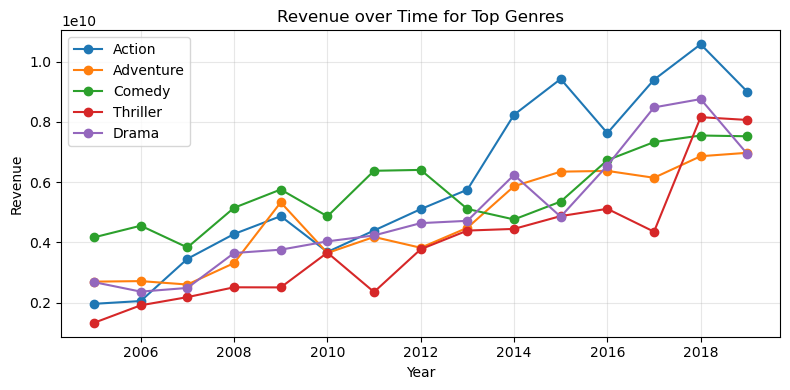

In [40]:
# Create a list of genres
genres = ['Action', 'Adventure', 'Comedy', 'Thriller', 'Drama']
# Create a figure for the plot
plt.figure(figsize=(8, 4))
# Iterate over each genre
for genre in genres:
    # Filter the DataFrame for the current genre
    df_Oughts_genre = Oughts_df[Oughts_df['Genre'] == genre]
    # Group by year and calculate the median revenue for each year
    df_revenue_Oughts = df_Oughts_genre.groupby('Year')['Divided Revenue'].sum().reset_index()
    # Plot median revenue for the current genre
    plt.plot(df_revenue_Oughts['Year'], df_revenue_Oughts['Divided Revenue'], marker='o', linestyle='-', label=genre)
# Add title and labels
plt.title('Revenue over Time for Top Genres')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True, alpha=0.3)
# Show plot
plt.tight_layout()
plt.show()

In [14]:
#Create a bar chart to show profit totals for each genre arranged in decending order

sums_df= sums_df.sort_values(by="Profit Sum", ascending=False)

x_axis = np.arange(len(sums_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = sums_df["Profit Sum"]/1000000000

index_values = sums_df.index

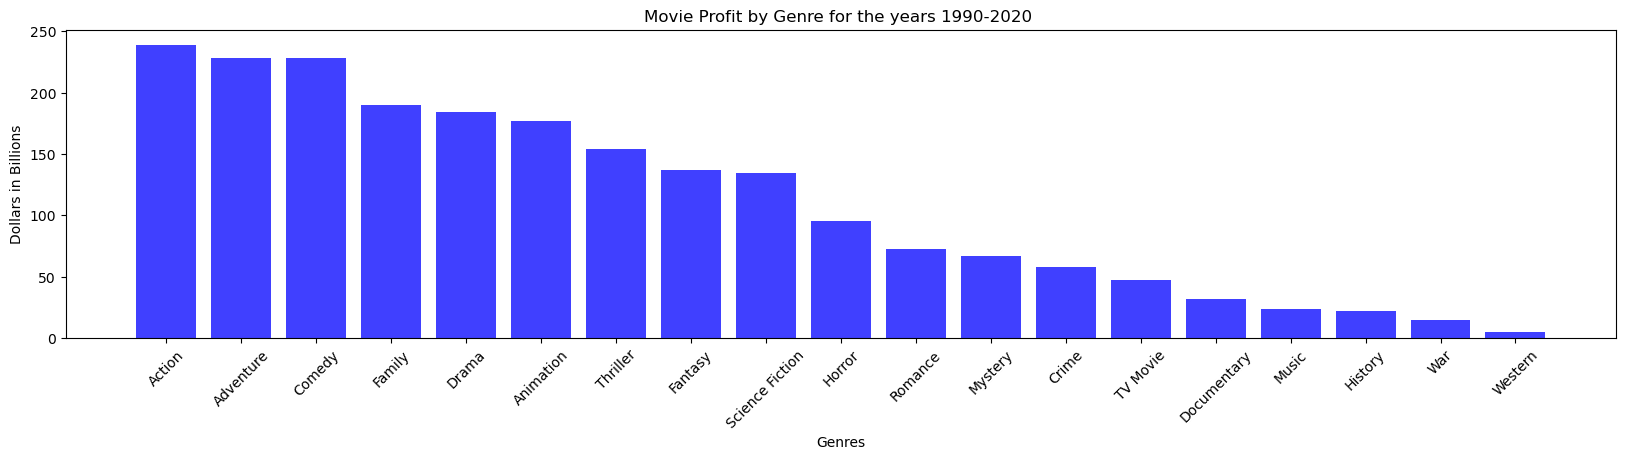

In [15]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(index_values, y_axis, color='b', alpha=0.75, align="edge")
plt.xticks(tick_locations, index_values, rotation=45)


plt.title("Movie Profit by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Billions")

plt.show()

In [16]:
#Create a bar chart to show divided revenue totals for each genre arranged in decending order

sums_df= sums_df.sort_values(by="Divided Revenue", ascending=False)

x_axis = np.arange(len(sums_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = sums_df["Divided Revenue"]/1000000000

index_values = sums_df.index

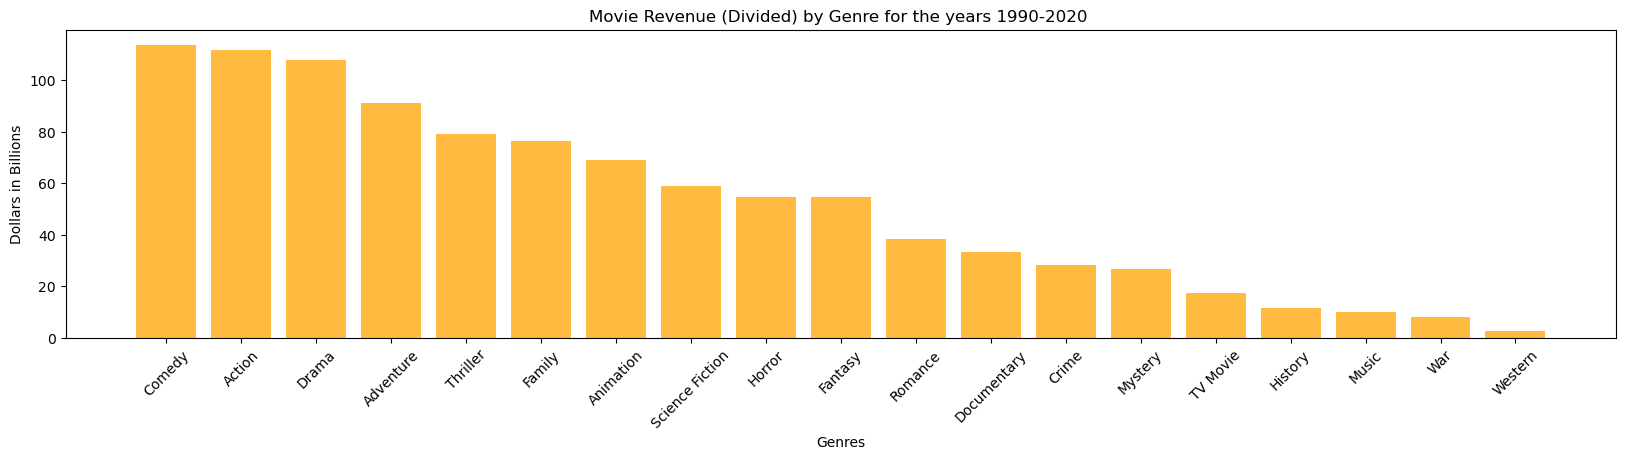

In [17]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(index_values, y_axis, color='orange', alpha=0.75, align="edge")
plt.xticks(tick_locations, index_values, rotation=45)


plt.title("Movie Revenue (Divided) by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Billions")

plt.show()

In [18]:
#Create a bar chart to show divided revenue totals for each genre arranged in decending order

sums_df= sums_df.sort_values(by="Divided Profit", ascending=False)

x_axis = np.arange(len(sums_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = sums_df["Divided Profit"]/1000000000

index_values = sums_df.index

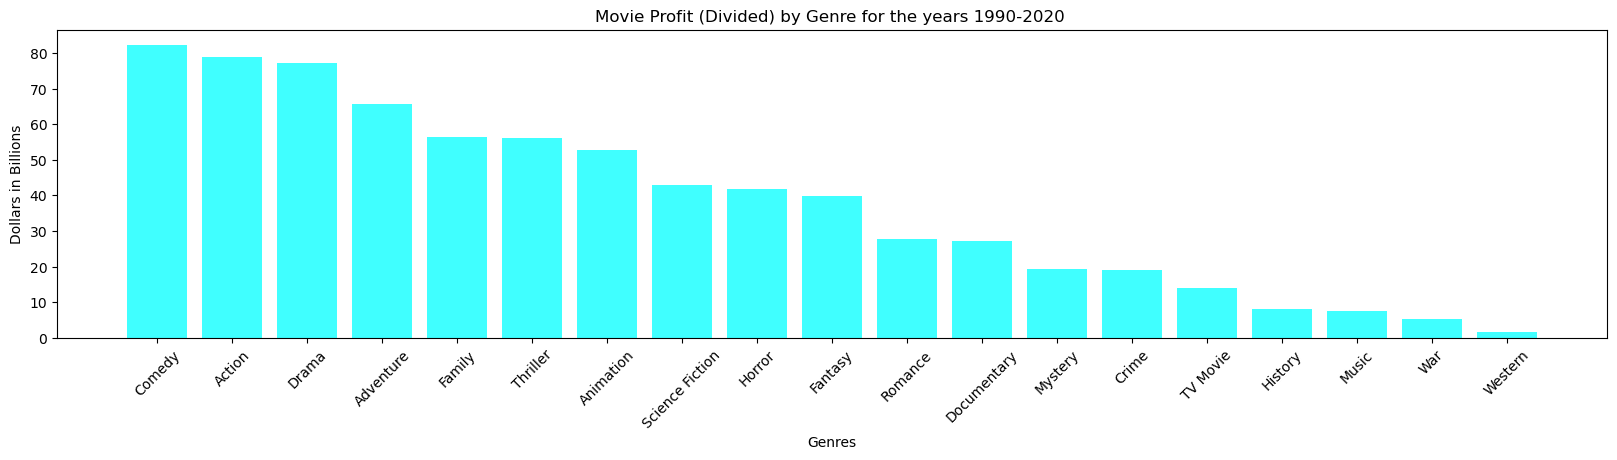

In [19]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(index_values, y_axis, color='cyan', alpha=0.75, align="edge")
plt.xticks(tick_locations, index_values, rotation=45)


plt.title("Movie Profit (Divided) by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Billions")

plt.show()

The r-value is: -0.4322276756760259


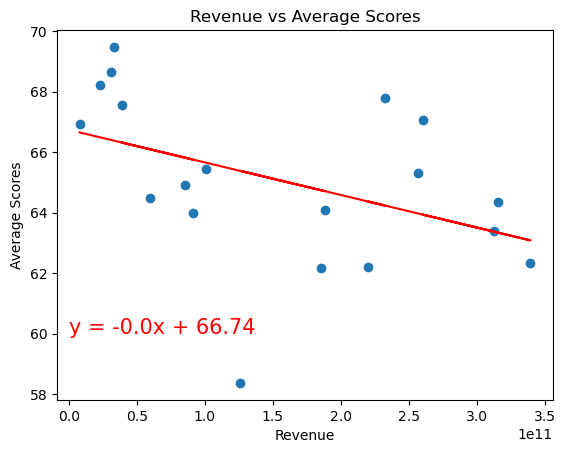

In [26]:
# Create a scatter plot which compares Revenue to Average Score

x_values = sums_df["Revenue Sum"]
y_values = sums_df["Score Avg"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,60), fontsize=15, color="red")
plt.xlabel("Revenue")
plt.ylabel("Average Scores")
plt.title("Revenue vs Average Scores")

plt.savefig('Revenue_V_Score_scatter_plot.png')
plt.show()

The r-value is: -0.43078635756892814


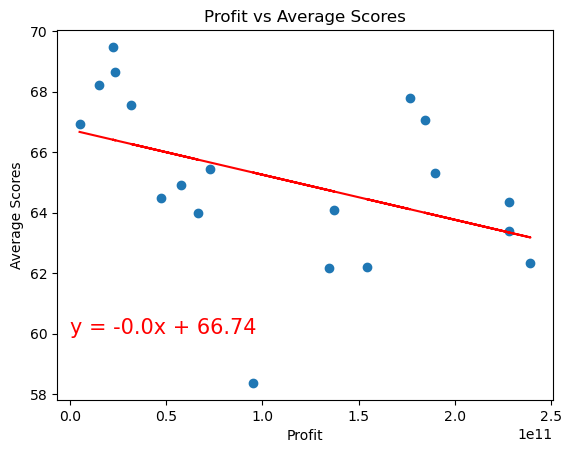

In [27]:
# Create a scatter plot which compares Revenue to Score Average

x_values = sums_df["Profit Sum"]
y_values = sums_df["Score Avg"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,60), fontsize=15, color="red")
plt.xlabel("Profit")
plt.ylabel("Average Scores")
plt.title("Profit vs Average Scores")

plt.savefig('Profit_V_Score_scatter_plot.png')

plt.show()

In [25]:
# Specify the value in the genre column to filter on
specific_genre = 'Action'

# Filter the DataFrame based on the specific value in the Genre column
filtered_df = df_genre[df_genre['Genre'] == specific_genre]

# Extract values from the 'Revenue' column based on the filtered DataFrame
values_list = filtered_df['Revenue'].tolist()

new_df = pd.DataFrame({'Action': values_list})

new_df

,Action
0,"171,539,887.00"
1,"326,709,727.00"
2,"2,923,706,026.00"
3,"75,958,800.00"
4,"20,844,907.00"
...,...
1370,"3,643,591.00"
1371,"684,351.00"
1372,"27,003,060.40"
1373,"6,698,361.00"


In [ ]:
# # Initialize a dictionary to store values from the Revenue column based on different the different genres
# values_dict = {}

# # Specific values to check for in 'column1'
# specific_values = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
#        'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
#        'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
#        'TV Movie']

# # Initialize lists in the dictionary for each specific value
# for value in specific_values:
#     values_dict[value] = []

# # Iterate over the rows
# for index, row in df_genre.iterrows():
#     if row['Genre'] in specific_values:
#         values_dict[row['Genre']].append(row['Revenue'])
        
# # Pad shorter lists with None to make them equal in length in order to create the dataframe       
# max_length = max(len(df_genre['Genre']), len(df_genre['Revenue']))
# for key in values_dict:
#     values_dict[key] += [None] * (max_length - len(values_dict[key]))


# new_df = pd.DataFrame(values_dict)

# new_df

In [ ]:
data = new_df["Action"]

statistic, p_value = stats.normaltest(data)

print("Test Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The data does not come from a normal distribution.")
else:
    print("The data may come from a normal distribution.")